<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
Food_Delivery_Route_Efficiency_Dataset
</div>

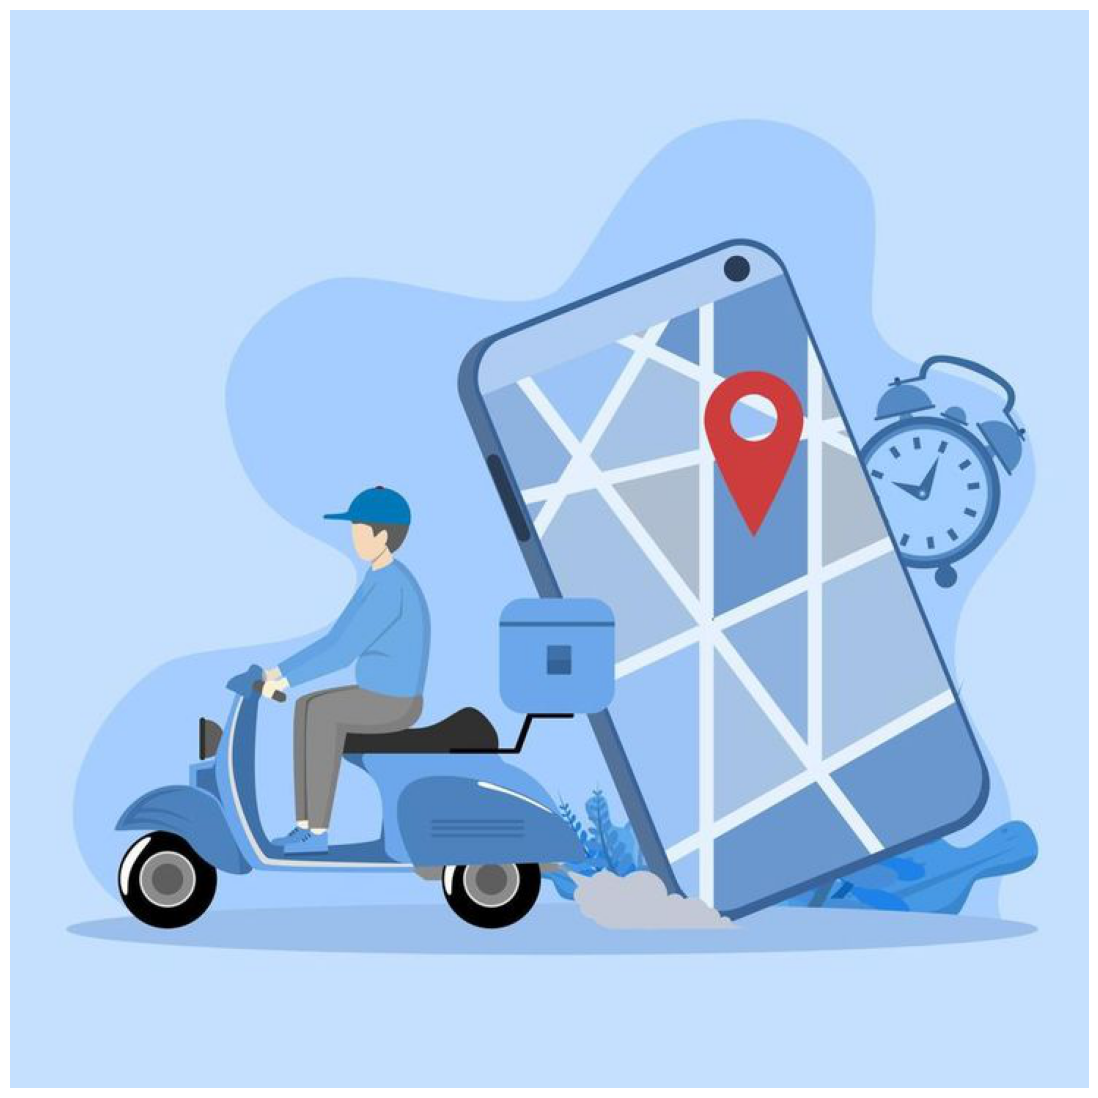

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Ashfidha\Downloads\Online transportation concept, Fast delivery with online smartphone ordering service, Courier rides scooter to home, Delivery service track website background landing page.jpeg")
plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')
plt.show()

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
IMPORT LIBRARIES,ALGORITHMS AND METRICS
</div>

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor 
import lightgbm as lgb
from tabulate import tabulate 

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
LOAD DATASET
</div>

In [20]:
fd_df=pd.read_csv(r"C:\Users\Ashfidha\Downloads\archive\Food_Delivery_Route_Efficiency_Dataset.csv")
fd_df

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone
0,1,7.97,63.8,High,9.75,Bicycle,Clear,2025-01-01 15:29,South,North
1,2,0.90,7.6,High,1.28,Car,Cloudy,2025-01-03 00:47,West,North
2,3,11.12,78.0,Medium,16.65,Bike,Rainy,2025-01-04 17:32,South,Central
3,4,4.90,24.8,Low,5.25,Scooter,Rainy,2025-01-01 14:12,Central,Central
4,5,10.04,56.0,High,11.34,Car,Rainy,2025-01-02 16:50,West,North
...,...,...,...,...,...,...,...,...,...,...
195,196,9.02,38.4,Low,9.57,Bike,Cloudy,2025-01-03 09:22,Central,South
196,197,6.73,59.2,Low,10.04,Bike,Cloudy,2025-01-03 03:32,South,South
197,198,6.98,51.4,High,7.83,Scooter,Cloudy,2025-01-01 08:03,Central,West
198,199,3.80,29.2,Medium,5.34,Bicycle,Rainy,2025-01-04 07:34,South,North


<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
COLUMN,SHAPE,INFO,DESCRIBE
</div>

In [21]:
fd_df.columns

Index(['order_id', 'distance_km', 'delivery_time_min', 'traffic_level',
       'route_length_km', 'delivery_mode', 'weather', 'order_time',
       'restaurant_zone', 'customer_zone'],
      dtype='object')

| **Column Name**       | **Description**                                     |
| --------------------- | --------------------------------------------------- |
| **order_id**          | Unique identifier for each order                    |
| **distance_km**       | Distance between restaurant and customer (in km)    |
| **delivery_time_min** | Time taken to deliver the order (in minutes)        |
| **traffic_level**     | Traffic condition during delivery (low/medium/high) |
| **route_length_km**   | Total route length followed (in km)                 |
| **delivery_mode**     | Delivery method used (bike/scooter/car)             |
| **weather**           | Weather condition during delivery                   |
| **order_time**        | Time when the order was placed                      |
| **restaurant_zone**   | Location zone of the restaurant                     |
| **customer_zone**     | Location zone of the customer                       |

In [22]:
fd_df.shape

(200, 10)

In [23]:
fd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           200 non-null    int64  
 1   distance_km        200 non-null    float64
 2   delivery_time_min  200 non-null    float64
 3   traffic_level      200 non-null    object 
 4   route_length_km    200 non-null    float64
 5   delivery_mode      200 non-null    object 
 6   weather            200 non-null    object 
 7   order_time         200 non-null    object 
 8   restaurant_zone    200 non-null    object 
 9   customer_zone      200 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 15.8+ KB


In [24]:
fd_df.describe(include='all')

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone
count,200.000000,200.000000,200.000000,200,200.000000,200,200,200,200,200
unique,NaN,NaN,NaN,3,NaN,4,4,198,5,5
top,NaN,NaN,NaN,High,NaN,Bicycle,Cloudy,2025-01-04 12:47,South,North
freq,NaN,NaN,NaN,68,NaN,52,55,2,54,46
mean,100.500000,6.624750,44.744500,NaN,8.155850,NaN,NaN,NaN,NaN,NaN
std,57.879185,3.371918,25.083925,NaN,4.303207,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.530000,2.400000,NaN,0.580000,NaN,NaN,NaN,NaN,NaN
25%,50.750000,3.687500,23.725000,NaN,4.420000,NaN,NaN,NaN,NaN,NaN
50%,100.500000,6.845000,44.650000,NaN,8.520000,NaN,NaN,NaN,NaN,NaN
75%,150.250000,9.797500,63.900000,NaN,11.800000,NaN,NaN,NaN,NaN,NaN


<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
DATA PREPROCESSING
</div>

In [25]:
fd_df.isnull().sum()

order_id             0
distance_km          0
delivery_time_min    0
traffic_level        0
route_length_km      0
delivery_mode        0
weather              0
order_time           0
restaurant_zone      0
customer_zone        0
dtype: int64

In [26]:
for x in fd_df.columns:
    print(f"column:(x)")
    print(fd_df[x].unique())

column:(x)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
column:(x)
[ 7.97  0.9  11.12  4.9  10.04 10.96  9.6   6.24  9.98  2.48  7.23  6.65
 11.42  1.26  9.88  4.69  7.27 10.19  2.11  3.12  8.22  8.13  0.54  5.15
  0.53  4.23  8.53 

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
VISUALIZATION
</div>

<div style="background-color: brown; padding: 15px; border-radius: 15px; text-align: center; font-size: 27px;">
1) UNIVARIATE ANALYSIS
</div>

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 10px; border-radius: 15px; text-align: center; font-size: 25px;">
HISTPLOT
</div>

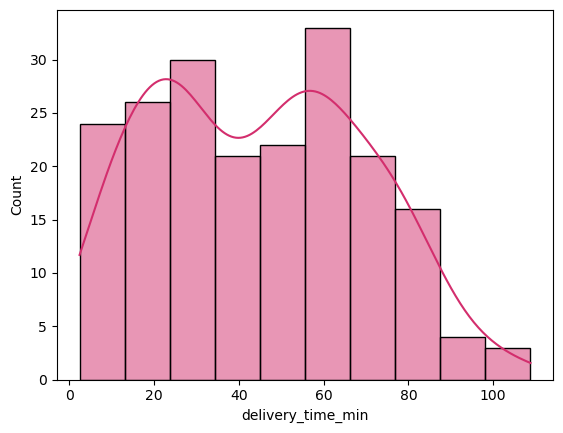

In [27]:
sns.histplot(fd_df['delivery_time_min'],kde=True,bins=10,color='#d32e6dea')
plt.show()

### The histogram shows that delivery times vary widely, typically falling between 20 and 60 minutes, with fewer very long deliveries up to 110 minutes.

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 25px;">
COUNTPLOT
</div>

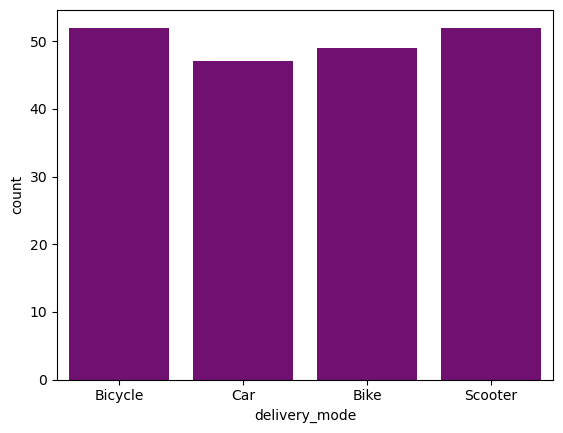

In [28]:
sns.countplot(x='delivery_mode',data=fd_df,color="purple")
plt.show()

### The countplot shows that all four delivery modes—Bicycle, Car, Bike, and Scooter—are used in nearly equal proportions, with only minor differences. Bicycle and Scooter have the highest counts, while Car has the lowest, but overall the distribution is fairly balanced.

<div style="background-color: brown; padding: 15px; border-radius: 15px; text-align: center; font-size: 30px;">
2) BIVARIATE ANALYSIS
</div>

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 25px;">
BARPLOT
</div>

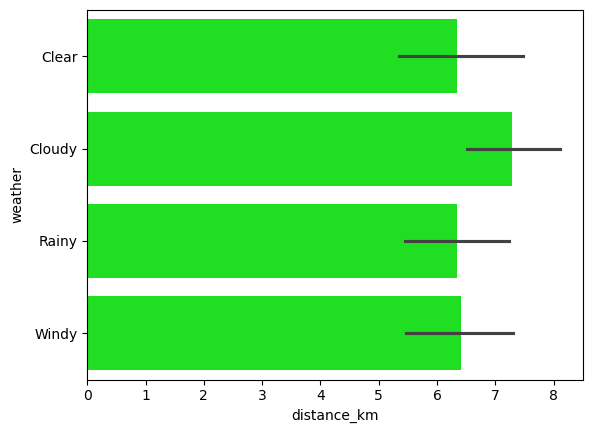

In [29]:
sns.barplot(x='distance_km',y='weather',data=fd_df,color='#00ff04ea')
plt.show()

### The plot shows that average delivery distance remains almost the same across all weather conditions, with cloudy weather having a slightly longer average distance.

<div style="background-color: BROWN; padding: 15px; border-radius: 15px; text-align: center; font-size: 30px;">
3) MULTIVARIATE ANALYSIS
</div>

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 25px;">
HEATMAP
</div>

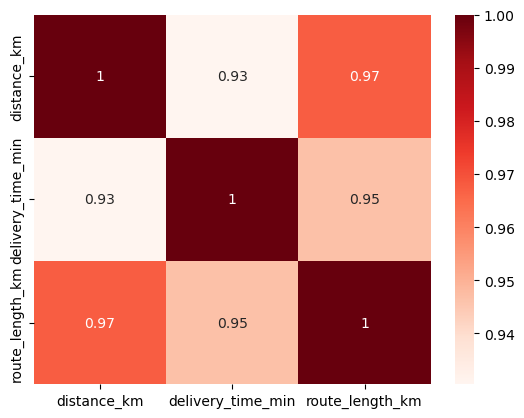

In [30]:
sns.heatmap(fd_df[['distance_km','delivery_time_min','route_length_km',]].corr(),annot=True,cmap='Reds')
plt.show()

### The heatmap shows strong positive correlations among distance, route length, and delivery time. As distance or route length increases, delivery time rises accordingly, indicating that these factors are closely linked and highly influential in predicting delivery duration.

In [31]:
fd_df.drop(['order_id','restaurant_zone','customer_zone'],axis=1,inplace=True)

In [32]:
fd_df

,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time
0,7.97,63.8,High,9.75,Bicycle,Clear,2025-01-01 15:29
1,0.90,7.6,High,1.28,Car,Cloudy,2025-01-03 00:47
2,11.12,78.0,Medium,16.65,Bike,Rainy,2025-01-04 17:32
3,4.90,24.8,Low,5.25,Scooter,Rainy,2025-01-01 14:12
4,10.04,56.0,High,11.34,Car,Rainy,2025-01-02 16:50
...,...,...,...,...,...,...,...
195,9.02,38.4,Low,9.57,Bike,Cloudy,2025-01-03 09:22
196,6.73,59.2,Low,10.04,Bike,Cloudy,2025-01-03 03:32
197,6.98,51.4,High,7.83,Scooter,Cloudy,2025-01-01 08:03
198,3.80,29.2,Medium,5.34,Bicycle,Rainy,2025-01-04 07:34


In [33]:
fd_df['order_time'] = pd.to_datetime(fd_df['order_time'])
fd_df['order_hour'] = fd_df['order_time'].dt.hour
fd_df['order_day'] = fd_df['order_time'].dt.dayofweek
fd_df = fd_df.drop('order_time', axis=1)

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
LABEL ENCODING
</div>

In [34]:
le=LabelEncoder()

In [35]:
cols=['delivery_mode','weather']
for col in cols:
    fd_df[col]=le.fit_transform(fd_df[col])
fd_df[cols]

,delivery_mode,weather
0,0,0
1,2,1
2,1,2
3,3,2
4,2,2
...,...,...
195,1,1
196,1,1
197,3,1
198,0,2


<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
ORDINAL ENCODING
</div>

In [36]:
traffic_level=['High','Medium','Low']
oe=OrdinalEncoder(categories=[traffic_level])
fd_df[['traffic_level']] = oe.fit_transform(fd_df[['traffic_level']])

In [37]:
fd_df

,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_hour,order_day
0,7.97,63.8,0.0,9.75,0,0,15,2
1,0.90,7.6,0.0,1.28,2,1,0,4
2,11.12,78.0,1.0,16.65,1,2,17,5
3,4.90,24.8,2.0,5.25,3,2,14,2
4,10.04,56.0,0.0,11.34,2,2,16,3
...,...,...,...,...,...,...,...,...
195,9.02,38.4,2.0,9.57,1,1,9,4
196,6.73,59.2,2.0,10.04,1,1,3,4
197,6.98,51.4,0.0,7.83,3,1,8,2
198,3.80,29.2,1.0,5.34,0,2,7,5


<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
SCALING
</div>

In [38]:
scaler=MaxAbsScaler()
scaled_data=scaler.fit_transform(fd_df)

In [39]:
fd_df=pd.DataFrame(scaled_data,columns=fd_df.columns)
fd_df

,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_hour,order_day
0,0.664167,0.586397,0.0,0.563910,0.000000,0.000000,0.652174,0.4
1,0.075000,0.069853,0.0,0.074031,0.666667,0.333333,0.000000,0.8
2,0.926667,0.716912,0.5,0.962984,0.333333,0.666667,0.739130,1.0
3,0.408333,0.227941,1.0,0.303644,1.000000,0.666667,0.608696,0.4
4,0.836667,0.514706,0.0,0.655870,0.666667,0.666667,0.695652,0.6
...,...,...,...,...,...,...,...,...
195,0.751667,0.352941,1.0,0.553499,0.333333,0.333333,0.391304,0.8
196,0.560833,0.544118,1.0,0.580682,0.333333,0.333333,0.130435,0.8
197,0.581667,0.472426,0.0,0.452863,1.000000,0.333333,0.347826,0.4
198,0.316667,0.268382,0.5,0.308849,0.000000,0.666667,0.304348,1.0


### Overall, the EDA shows that delivery time is mainly influenced by distance, route length, traffic, and weather conditions. Peak hours and certain zone-to-zone routes consistently cause delays, while delivery mode and environmental factors also add variability. These patterns highlight key areas for improving route planning and operational efficiency.

<div style="background-color: lightblue; color:black; font-weight: bold; padding:15Px; border-radius: 15px; text-align: center; font-size: 35px;">
MODEL BUILDING
</div>

In [40]:
x=fd_df.drop('delivery_time_min',axis=1)
x

,distance_km,traffic_level,route_length_km,delivery_mode,weather,order_hour,order_day
0,0.664167,0.0,0.563910,0.000000,0.000000,0.652174,0.4
1,0.075000,0.0,0.074031,0.666667,0.333333,0.000000,0.8
2,0.926667,0.5,0.962984,0.333333,0.666667,0.739130,1.0
3,0.408333,1.0,0.303644,1.000000,0.666667,0.608696,0.4
4,0.836667,0.0,0.655870,0.666667,0.666667,0.695652,0.6
...,...,...,...,...,...,...,...
195,0.751667,1.0,0.553499,0.333333,0.333333,0.391304,0.8
196,0.560833,1.0,0.580682,0.333333,0.333333,0.130435,0.8
197,0.581667,0.0,0.452863,1.000000,0.333333,0.347826,0.4
198,0.316667,0.5,0.308849,0.000000,0.666667,0.304348,1.0


In [41]:
y=fd_df['delivery_time_min']
y

0      0.586397
1      0.069853
2      0.716912
3      0.227941
4      0.514706
         ...   
195    0.352941
196    0.544118
197    0.472426
198    0.268382
199    0.375000
Name: delivery_time_min, Length: 200, dtype: float64

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [43]:
model=LinearRegression()

In [44]:
model=model.fit(xtrain,ytrain)

In [45]:
y_pred=model.predict(xtest)

In [109]:
mse=mean_squared_error(ytest,y_pred)

In [110]:
r2=r2_score(ytest,y_pred)
r2

0.8919713980255112

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
RANDOM FOREST
</div>

In [111]:
rf_reg=RandomForestRegressor(n_estimators=100, random_state=42)

In [112]:
rf_reg.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

In [113]:
yrf_pred=rf_reg.predict(xtest)

In [114]:
r21=r2_score(ytest,yrf_pred)

In [115]:
r21

0.8532329086024081

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
DECISION TREE
</div>

In [116]:
dt_reg=DecisionTreeRegressor(max_depth=4,criterion='squared_error',random_state=42)

In [117]:
dt_reg.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [118]:
y_pred1=rf_reg.predict(xtest)

In [119]:
r22=r2_score(ytest,y_pred1)

In [120]:
r22

0.8532329086024081

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
SVM
</div>

In [121]:
svcl=SVR(kernel="linear")

In [122]:
svcl=svcl.fit(xtrain, ytrain)

In [123]:
yl_pred=svcl.predict(xtest)

In [124]:
r23=r2_score(ytest,yl_pred)
r23

0.8754517168593264

In [125]:
svcr=SVR(kernel="rbf")

In [126]:
svcr=svcr.fit(xtrain,ytrain)

In [127]:
yr_pred=svcl.predict(xtest)

In [128]:
r24=r2_score(ytest,yr_pred)
r24

0.8754517168593264

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
RIDGE, LASSO
</div>

In [129]:
model2=Ridge(alpha=1.0)

In [130]:
model2.fit(xtrain,ytrain)

Ridge()

In [131]:
y_pred2=model2.predict(xtest)

In [132]:
r2r=r2_score(ytest,y_pred2)
r2r

0.8898417429681837

In [133]:
model3=Lasso(alpha=0.1)

In [134]:
model3.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [135]:
y_pred3=model3.predict(xtest)

In [136]:
r2l=r2_score(ytest,y_pred3)
r2l

-0.03276393763444729

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
KNN
</div>

In [137]:
metric_k=[]
neighbors=np.arange(3,15)

In [138]:
for k in neighbors:
    classifier=KNeighborsRegressor(n_neighbors=k,metric='euclidean')
    classifier.fit(xtrain,ytrain)
    y_prediction=classifier.predict(xtest)
    r2=r2_score(ytest, y_prediction)
    metric_k.append(r2)

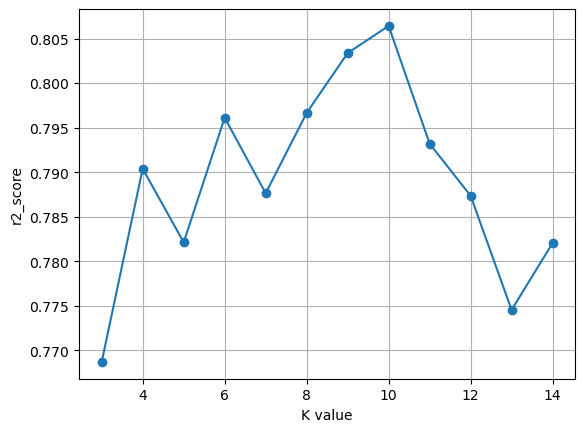

In [139]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('r2_score')
plt.grid()
plt.show()

In [140]:
classifier=KNeighborsRegressor(n_neighbors=10,metric='euclidean')
knn=classifier.fit(xtrain,ytrain)
y_prediction=classifier.predict(xtest)

In [141]:
KNN_r2=r2_score(ytest,y_prediction)
KNN_r2

0.806422663102784

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
XGBOOST,CATBOOST,LIGHTGBM
</div>

In [142]:
from xgboost import XGBRegressor

In [143]:
model_xg=XGBRegressor()

In [144]:
model_xg=model.fit(xtrain,ytrain)

In [145]:
yxg_pred=model.predict(xtest)

In [146]:
msexg=mean_squared_error(ytest,yxg_pred)
r2xg=r2_score(ytest,yxg_pred)

In [147]:
msexg

0.006640152144454502

In [148]:
r2xg

0.8650620543804526

In [149]:
from catboost import CatBoostRegressor

In [150]:
model_c=CatBoostRegressor()

In [151]:
model_c=model.fit(xtrain,ytrain)

In [152]:
yc_pred=model.predict(xtest)

In [153]:
r2c=r2_score(ytest,yc_pred)
r2c

0.8650620543804526

In [154]:
r2c

0.8650620543804526

In [156]:
import lightgbm as lgb
modelgb=lgb.LGBMRegressor(verbose=0)

In [157]:
modelgb=model.fit(xtrain,ytrain)

In [158]:
ygb_pred=model.predict(xtest)

In [159]:
msegb=mean_squared_error(ytest,ygb_pred)
r2gb=r2_score(ytest,ygb_pred)

In [160]:
msegb

0.006640152144454502

In [161]:
r2gb

0.8650620543804526

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
TABULATE
</div>

In [162]:
from tabulate import tabulate
table=[['Model','R2'],['Linear Regression',r2_score(ytest,y_pred)],['KNN',r2_score(ytest,y_prediction)],['Random Forest',r2_score(ytest,yrf_pred)],['Decision tree',r2_score(ytest,y_pred1)],['Ridge Regression',r2_score(ytest,y_pred2)],['Lasso Regession',r2_score(ytest,y_pred3)],['xgboost',r2_score(ytest,yxg_pred)],['catboost',r2_score(ytest,yc_pred)],['lightgbm',r2_score(ytest,ygb_pred)],['SVC',r2_score(ytest,yl_pred)],['SVR',r2_score(ytest,yr_pred)]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════╤════════════╕
│ Model             │         R2 │
╞═══════════════════╪════════════╡
│ Linear Regression │  0.891971  │
├───────────────────┼────────────┤
│ KNN               │  0.806423  │
├───────────────────┼────────────┤
│ Random Forest     │  0.853233  │
├───────────────────┼────────────┤
│ Decision tree     │  0.853233  │
├───────────────────┼────────────┤
│ Ridge Regression  │  0.889842  │
├───────────────────┼────────────┤
│ Lasso Regession   │ -0.0327639 │
├───────────────────┼────────────┤
│ xgboost           │  0.865062  │
├───────────────────┼────────────┤
│ catboost          │  0.865062  │
├───────────────────┼────────────┤
│ lightgbm          │  0.865062  │
├───────────────────┼────────────┤
│ SVC               │  0.875452  │
├───────────────────┼────────────┤
│ SVR               │  0.875452  │
╘═══════════════════╧════════════╛


<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
HYPER PARAMETER TUNING
</div>

In [163]:
param_distributions = {
    "iterations": [500, 800, 1000],
    "learning_rate": [0.01, 0.03, 0.1],
    "depth": [4, 6, 8],
    "loss_function": ["RMSE"],
    "l2_leaf_reg": [1, 3, 5, 7]
}

model = CatBoostRegressor(verbose=0)


In [164]:
search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)                              
search.fit(xtrain, ytrain)

print("Best Params:", search.best_params_)
print("Best Score:", search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'loss_function': 'RMSE', 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 800, 'depth': 4}
Best Score: -0.006358502979647466


In [165]:
model_cats=CatBoostRegressor(verbose=0,learning_rate=0.1,l2_leaf_reg=3,iterations=500,depth=4,loss_function="RMSE")

In [166]:
model_cats.fit(xtrain, ytrain)

In [167]:
y_cats=model_cats.predict(xtest)

In [168]:
r2_cats=r2_score(ytest,y_cats)
r2_cats

0.8565506982239788

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
REGRESSION METRICS
</div>

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rmse=np.sqrt(mse)

In [170]:
rmse

np.float64(0.072910713149613)

In [171]:
mae=mean_absolute_error(ytest,y_pred2)
mae

0.058177626129831295

<div style="background-color: lightblue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
PREDICTION
</div>

In [172]:
new_data=[[0.664167,0.0,0.563910,0.000000,0.000000,0.652174,0.4]]

In [173]:
predicted=model_c.predict(new_data)
predicted

array([0.58164406])